# Visual Dominance Index and baseline task analyses

This script intends to perform behavioral analyses (Repeated measures ANOVA with post-hocs) on data recorded as part of the experiment "Modeling Shift from Efficient to Inefficient divided attention" (CER 2020-322).

In [3]:
import os

from pprint import pprint
from statistics import mean

import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
%matplotlib inline

In [30]:
## Paths
main_path = "/home/dcas/j.torre-tresols/data/EEG/data_shift"  # Path to change
behavior_path = os.path.join(main_path, "behavioral")

In [31]:
# Load file
acc_rt_path = os.path.join(behavior_path, "Acc_RT_all.mat")

# Process mat file into DataFrame
mat = sio.loadmat(acc_rt_path)
mat_dict = {key: np.array(value).flatten('F') for key, value in mat.items() if '__' not in key}
acc_rt_df = pd.DataFrame(mat_dict)

# Df variables
n_sub = len(acc_rt_df) // 11
variables = ['ACC_AS', 'ACC_VS', 'ACC_AV', 'ACC_VA', 'RT_AS', 'RT_VS', 'RT_AV', 'RT_VA', 'VDI_SINGLE', 'VDI_DOUBLE']
modalities = ['AUDIO', 'VISUAL', 'AUDIO', 'VISUAL', 'AUDIO', 'VISUAL', 'AUDIO', 'VISUAL', 'VDI', 'VDI']
tasks = ['SINGLE', 'SINGLE', 'DOUBLE', 'DOUBLE', 'SINGLE', 'SINGLE', 'DOUBLE', 'DOUBLE', 'SINGLE', 'DOUBLE']

ids = list(range(1, n_sub + 1)) * len(variables)
var_list = []
mod_list = []
task_list = []
for var, mod, task in zip(variables, modalities, tasks):
    var_list.extend([var] * n_sub)
    mod_list.extend([mod] * n_sub)
    task_list.extend([task] * n_sub)

# Df modification
acc_rt_df = acc_rt_df[n_sub:]  ## Removing the first n_sub rows (??)
acc_rt_df.reset_index(drop = True, inplace=True)

acc_rt_df['id'] = ids
acc_rt_df['var'] = var_list
acc_rt_df['modality'] = mod_list
acc_rt_df['task'] = task_list

In [32]:
# Split the df in ACCuracies, Reaction Times and Visual Dominance Index
df_acc = acc_rt_df.iloc[:n_sub * 4]
df_rt = acc_rt_df.iloc[n_sub * 4:2 * n_sub * 4]
df_vdi = acc_rt_df.iloc[2 * n_sub * 4:]

Text(0.5, 1.0, 'Reaction times across participants')

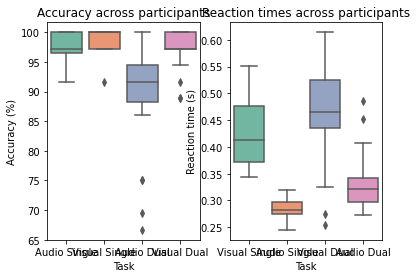

In [33]:
# BOXPLOTS
fig, axes = plt.subplots(1, 2)
plt_acc = sns.boxplot(ax = axes[0], x='var', y = 'Behavior_subj', data = df_acc, order = ['ACC_VS', 'ACC_AS', 'ACC_VA', 'ACC_AV'], palette = "Set2")
plt_acc.set_xticklabels(['Visual Single', 'Audio Single', 'Visual Dual', 'Audio Dual'])
plt_acc.set_xlabel('Task')
plt_acc.set_ylabel('Accuracy (%)')
plt_acc.set_title('Accuracy across participants')

plt_rt =  sns.boxplot(ax = axes[1], x='var', y = 'Behavior_subj', data = df_rt, order = ['RT_VS', 'RT_AS', 'RT_VA', 'RT_AV'], palette = "Set2")
plt_rt.set_xticklabels(['Visual Single', 'Audio Single', 'Visual Dual', 'Audio Dual'])
plt_rt.set_xlabel('Task')
plt_rt.set_ylabel('Reaction time (s)')
plt_rt.set_title('Reaction times across participants')

In [34]:
# ANOVA
res_acc = pg.rm_anova(dv='Behavior_subj', within=['task', 'modality'], subject='id', 
                      data=df_acc, detailed=True)
res_rt = pg.rm_anova(dv='Behavior_subj', within=['task', 'modality'], subject='id', 
                     data=df_rt, detailed=True)
res_vdi = pg.pairwise_ttests(dv='Behavior_subj', within='task', subject='id', 
                             padjust='bonf', data=df_vdi)
print("ANOVA ACC")
print(res_acc)
print("")

print("ANOVA RT")
print(res_rt)
print("")

print("ANOVA_VDI")
print(res_vdi)
print("")

ANOVA ACC
            Source          SS  ddof1  ddof2          MS          F     p-unc  \
0             task  567.129630      1     23  567.129630  31.598131  0.000010   
1         modality  464.248971      1     23  464.248971  19.000000  0.000230   
2  task * modality  217.335391      1     23  217.335391  11.398827  0.002604   

   p-GG-corr       np2  eps  
0   0.000010  0.578740  1.0  
1   0.000230  0.452381  1.0  
2   0.002604  0.331373  1.0  

ANOVA RT
            Source        SS  ddof1  ddof2        MS           F  \
0             task  0.041608      1     23  0.041608   24.562954   
1         modality  0.425113      1     23  0.425113  146.432957   
2  task * modality  0.000775      1     23  0.000775    0.332239   

          p-unc     p-GG-corr       np2  eps  
0  5.200807e-05  5.200807e-05  0.516430  1.0  
1  1.869564e-11  1.869564e-11  0.864253  1.0  
2  5.699419e-01  5.699419e-01  0.014239  1.0  

ANOVA_VDI
  Contrast       A       B  Paired  Parametric         T   dof 

In [10]:
# POST-HOCS
post_hoc_acc = pg.pairwise_ttests(dv='Behavior_subj', within=['modality','task'], subject='id', 
                                  padjust='bonf', effsize='eta-square', data=df_acc, 
                                  return_desc=True, interaction=True)
post_hoc_rt = pg.pairwise_ttests(dv='Behavior_subj', within=['task','modality'], subject='id', 
                                 padjust='bonf', effsize='eta-square', data=df_rt, 
                                 return_desc=True, interaction=True)

print("POST-HOC Accuracy")
print(post_hoc_acc)
print("")

print("POST-HOC Reaction Time")
print(post_hoc_rt)
print("")

          Contrast modality       A       B    mean(A)    std(A)    mean(B)  \
0         modality        -   AUDIO  VISUAL  93.518519  5.255589  97.916667   
1             task        -  DOUBLE  SINGLE  93.287037  5.126334  98.148148   
2  modality * task    AUDIO  DOUBLE  SINGLE  89.583333  9.056763  97.453704   
3  modality * task   VISUAL  DOUBLE  SINGLE  96.990741  3.267944  98.842593   

     std(B) Paired  Parametric         T   dof alternative     p-unc  \
0  2.422995   True        True -4.358899  23.0   two-sided  0.000230   
1  1.992449   True        True -5.621221  23.0   two-sided  0.000010   
2  2.706410   True        True -4.668345  23.0   two-sided  0.000106   
3  1.992449   True        True -3.762160  23.0   two-sided  0.001014   

     p-corr p-adjust      BF10  eta-square  
0       NaN      NaN   128.456    0.224072  
1       NaN      NaN  2146.208    0.280884  
2  0.000213     bonf    256.01    0.257406  
3  0.002027     bonf    34.658    0.104784  
          Contrast

# AudioVisual switching task analysis

In [27]:
# File paths
rt_file_path = os.path.join(behavior_path, 'RT_All.csv')
acc_file_path = os.path.join(behavior_path, 'Acc_All.csv')

# Variable dictionary. The keys represent the number codes for the variables, and the values represent the modality and task, respectively
var_dict = {1: ('VISUAL', 'SINGLE'), 2: ('AUDIO', 'SINGLE'), 
            3: ('VISUAL', 'SWITCH'), 4: ('AUDIO', 'SWITCH')}

# Open DFs
rt_df = pd.read_csv(rt_file_path, header=None, names=['RT', 'id', 'var', 'modality', 'task'])
acc_df = pd.read_csv(acc_file_path, header=None, names=['Acc', 'id', 'var', 'modality', 'task'])

for var, values in var_dict.items():
    rt_df.loc[rt_df['var'] == var, 'modality'] = values[0]
    rt_df.loc[rt_df['var'] == var, 'task'] = values[1]
    
    acc_df.loc[acc_df['var'] == var, 'modality'] = values[0]
    acc_df.loc[acc_df['var'] == var, 'task'] = values[1]
mrt_df = rt_df.copy()
mrt_df.drop_duplicates(subset=['id', 'var'], inplace = True)
mrt_df.reset_index(drop = True, inplace = True)

for var, ids in zip(var_dict.keys(), pd.unique(mrt_df['id'])):
    mrt_df.loc[(mrt_df['id'] == ids) & (mrt_df['var'] == var), 'RT'] = mean(rt_df.loc[(rt_df['var']==var) & (rt_df['id'] == ids),'RT'])


Text(0.5, 1.0, 'Reaction times across participants')

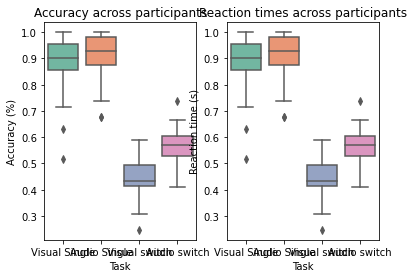

In [28]:
# BOXPLOTS
fig2, axes2 = plt.subplots(1, 2)

plt_acc = sns.boxplot(ax=axes2[0], x='var', y = 'Acc', data=acc_df,  order = [1,2,3,4], palette="Set2")
plt_acc.set_xticklabels(['Visual Single', 'Audio Single', 'Visual switch', 'Audio switch'])
plt_acc.set_xlabel('Task')
plt_acc.set_ylabel('Accuracy (%)')
plt_acc.set_title('Accuracy across participants')

plt_rt =  sns.boxplot(ax=axes2[1], x='var', y='RT', data=mrt_df, order = [1,2,3,4], palette="Set2")
plt_rt.set_xticklabels(['Visual Single', 'Audio Single', 'Visual switch', 'Audio switch'])
plt_rt.set_xlabel('Task')
plt_rt.set_ylabel('Reaction time (s)')
plt_rt.set_title('Reaction times across participants')

In [35]:
#ANOVA
res_acc = pg.rm_anova(dv='Acc', within=['task', 'modality'], subject='id', 
                      data=acc_df, detailed=True)
res_rt = pg.rm_anova(dv='RT', within=['task', 'modality'], subject='id', 
                     data=mrt_df, detailed=True)

print("ANOVA ACC")
print(res_acc)
print("")

print("ANOVA RT")
print(res_rt)
print("")

ANOVA ACC
            Source        SS  ddof1  ddof2        MS           F  \
0             task  3.526088      1     23  3.526088  503.705486   
1         modality  0.147112      1     23  0.147112   24.345244   
2  task * modality  0.059571      1     23  0.059571   13.193782   

          p-unc     p-GG-corr       np2  eps  
0  3.864583e-17  3.864583e-17  0.956332  1.0  
1  5.492827e-05  5.492827e-05  0.514207  1.0  
2  1.394999e-03  1.394999e-03  0.364532  1.0  

ANOVA RT
            Source        SS  ddof1  ddof2        MS           F  \
0             task  3.526088      1     23  3.526088  503.705486   
1         modality  0.147112      1     23  0.147112   24.345244   
2  task * modality  0.059571      1     23  0.059571   13.193782   

          p-unc     p-GG-corr       np2  eps  
0  3.864583e-17  3.864583e-17  0.956332  1.0  
1  5.492827e-05  5.492827e-05  0.514207  1.0  
2  1.394999e-03  1.394999e-03  0.364532  1.0  

